In [1]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle


# Data Exploration

In [3]:
#importing the dataset
df = pd.read_csv('Breast_cancer.csv')

In [4]:
df.shape

(674, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_Thickness              674 non-null    int64 
 1    Uniformity_of_Cell_Shape    674 non-null    int64 
 2   Marginal_Adhesion            674 non-null    int64 
 3   Single_Epithelial_Cell_Size  674 non-null    int64 
 4   Bare_Nuclei                  674 non-null    int64 
 5   Bland_Chromatin              674 non-null    int64 
 6   Normal_Nucleoli              674 non-null    int64 
 7   Mitoses                      674 non-null    int64 
 8   Class                        674 non-null    object
dtypes: int64(8), object(1)
memory usage: 47.5+ KB


In [6]:
df.describe()

,Clump_Thickness,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,4.451039,3.212166,2.851632,3.231454,3.541543,3.443620,2.888724,1.608309
std,2.822875,2.977544,2.877169,2.209628,3.639256,2.455657,3.067021,1.742142
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [7]:
df.head()

,Clump_Thickness,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,4,5,7,10,3,2,1,B
1,3,1,1,2,2,3,1,1,B
2,6,8,1,3,4,3,7,1,B
3,4,1,3,2,1,3,1,1,B
4,8,10,8,7,10,9,7,1,M


<Axes: xlabel='Class', ylabel='count'>

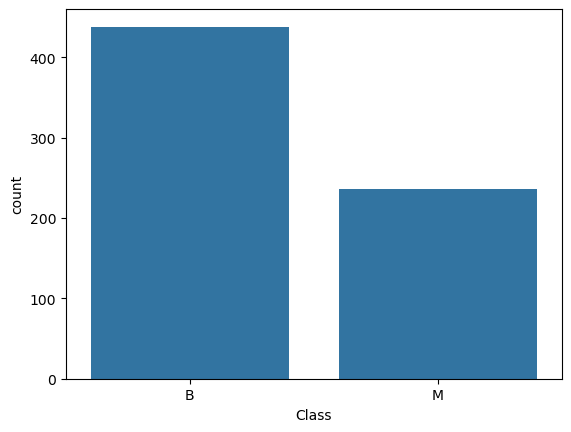

In [8]:
sns.barplot(df['Class'].value_counts())

<Axes: xlabel='Clump_Thickness', ylabel='Marginal_Adhesion'>

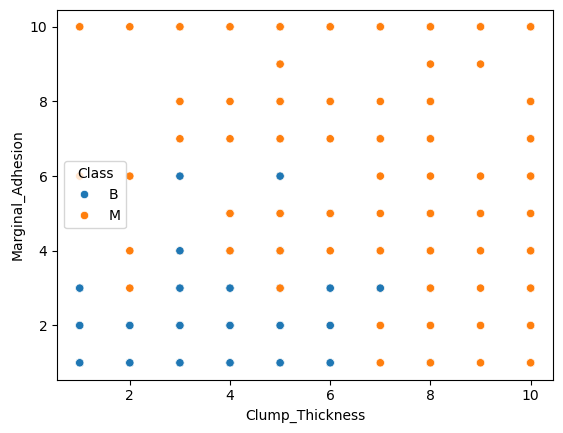

In [9]:
sns.scatterplot(x='Clump_Thickness', y='Marginal_Adhesion', hue='Class', data=df)

<Axes: xlabel='Single_Epithelial_Cell_Size', ylabel='Mitoses'>

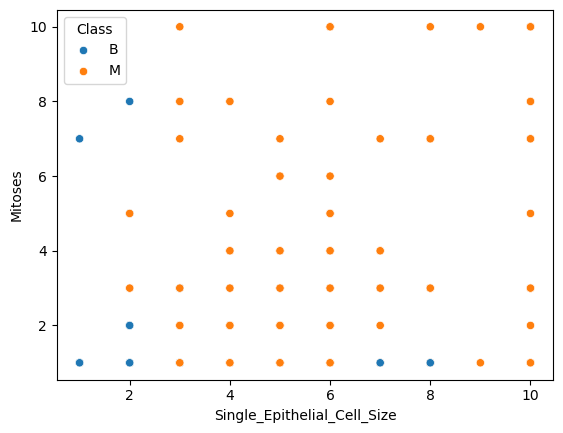

In [10]:
sns.scatterplot(x='Single_Epithelial_Cell_Size', y='Mitoses', hue='Class', data=df)

## Data Preprocessing

In [12]:
#Label encoding
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

#Splitting the Data

In [14]:
x = df.iloc[0:,0:-1]
y = df.iloc[:,-1]

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
x_train.shape

(539, 8)

In [17]:
y_train.shape

(539,)

In [18]:
x_test.shape

(135, 8)

In [19]:
y_test.shape

(135,)

# Model Building

Model-1 Logistic Regression

In [22]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [23]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [24]:
cv_scores = cross_val_score(model1, x, y, cv=kfold, scoring='accuracy')

In [25]:
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean()}")
print(f"Standard deviation: {cv_scores.std()}")


Cross-validation scores: [0.97037037 0.97037037 0.97037037 0.97037037 0.94776119]
Mean accuracy: 0.9658485351022664
Standard deviation: 0.009043670536207847


In [26]:
y_pred=model1.predict(x_test)

In [27]:
accuracy_score(y_pred,y_test)

0.9629629629629629

In [28]:
cm=confusion_matrix(y_pred,y_test)

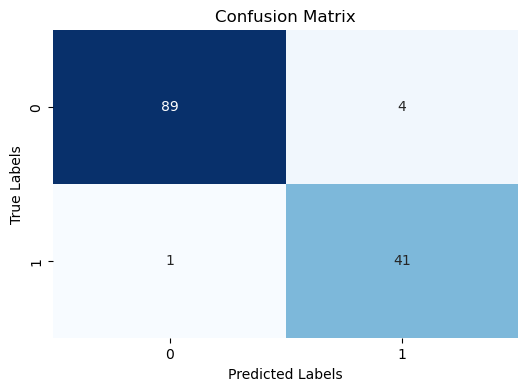

In [29]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [30]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        93
           1       0.91      0.98      0.94        42

    accuracy                           0.96       135
   macro avg       0.95      0.97      0.96       135
weighted avg       0.96      0.96      0.96       135



Model-2 Decision Tree


In [32]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
cv_scores = cross_val_score(model2, x, y, cv=kfold, scoring='accuracy')

In [34]:
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean()}")
print(f"Standard deviation: {cv_scores.std()}")


Cross-validation scores: [0.95555556 0.95555556 0.91851852 0.92592593 0.94029851]
Mean accuracy: 0.9391708126036485
Standard deviation: 0.0151005666978405


In [35]:
y_pred=model2.predict(x_test)

In [36]:
accuracy_score(y_pred,y_test)

0.9333333333333333

In [37]:
cm=confusion_matrix(y_pred,y_test)

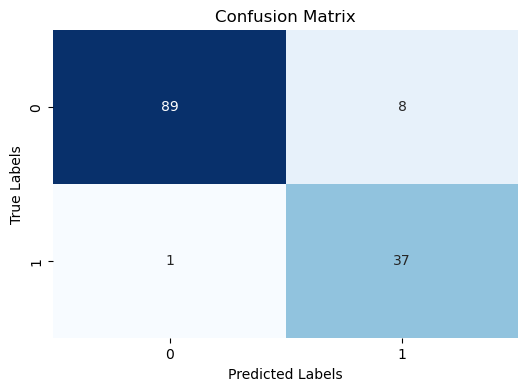

In [38]:
# Plotting the heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [39]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95        97
           1       0.82      0.97      0.89        38

    accuracy                           0.93       135
   macro avg       0.91      0.95      0.92       135
weighted avg       0.94      0.93      0.93       135



Model-3 RandomForest classifier

In [41]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
cv_scores = cross_val_score(model2, x, y, cv=kfold, scoring='accuracy')

In [43]:
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean()}")
print(f"Standard deviation: {cv_scores.std()}")


Cross-validation scores: [0.94814815 0.96296296 0.92592593 0.91851852 0.93283582]
Mean accuracy: 0.9376782752902155
Standard deviation: 0.015984974370109255


In [44]:
y_pred = model3.predict(x_test)

In [45]:
accuracy_score(y_pred,y_test)

0.9851851851851852

In [46]:
cm=confusion_matrix(y_pred,y_test)

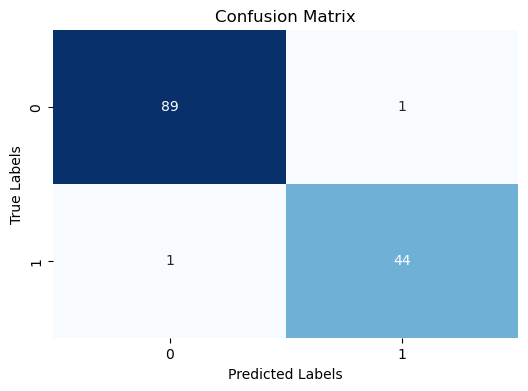

In [47]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [48]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        45

    accuracy                           0.99       135
   macro avg       0.98      0.98      0.98       135
weighted avg       0.99      0.99      0.99       135



In [49]:
# Save the model with pickle
with open("breast_cancer_model.pkl", "wb") as file:
    pickle.dump(model1, file)